In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploring the data

## Importing value

In [81]:
data_df = pd.read_csv('../raw_data/1M_rows_raw.csv')

In [80]:
# data_df.info()

## Column renamimg

In [82]:
data_df.rename(columns={'_sdc_source_key_id':'order_ID',
                        'sku':'item_ID',
                        'item price':'item_price',
                        'item quantity':'item_quantity',
                        'line-item discount':'discount',
                        'price_qty':'final_price',
                        'email':'customer_ID',
                        'Nationality':'nationality'
                        },
                             inplace = True)
data_df.columns

Index(['order_ID', 'item_ID', 'date', 'price', 'quantity', 'discount',
       'final_price', 'vendor', 'title', 'product_type', 'tags', 'customer_ID',
       'gender', 'age', 'nationality', 'premium_status', 'district'],
      dtype='object')

## Working on NA values

In [83]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.84%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.81%
NA values in title : 14.81%
NA values in product_type : 32.77%
NA values in tags : 41.43%
NA values in customer_ID : 1.29%
NA values in gender : 1.7%
NA values in age : 6.3%
NA values in nationality : 47.66%
NA values in premium_status : 0.0%
NA values in district : 6.76%


### Droping NA item_ID, customer_ID

In [84]:
data_df.dropna(subset=['item_ID', 'customer_ID'],inplace=True)

In [85]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.41%
NA values in age : 5.03%
NA values in nationality : 46.95%
NA values in premium_status : 0.0%
NA values in district : 5.5%


### For district, nationality, gender,  - most comun one

#### district

In [66]:
# data_df['district'].unique()

In [86]:
for district in data_df['district'].unique():
    count=data_df[data_df['district'] == district]['district'].count()
    if count/len(data_df)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_df)  *  100     ,2)}%')

Kowloon City : 5.5%
Eastern : 9.11%
Central & Western : 32.94%
Wan Chai : 6.58%
Southern : 5.81%


In [87]:
data_df['district'] = data_df['district'].fillna('Central & Western')

#### nationality

In [69]:
# data_df['nationality'].unique()

In [88]:
for nationality in data_df['nationality'].unique():
    count=data_df[data_df['nationality'] == nationality]['nationality'].count()
    if count/len(data_df)*100 > 1:
        print(f'{nationality} : {round(    count   /   len(data_df)  *  100     ,2)}%')

Hong Kong SAR : 39.2%
United Kingdom : 1.47%
Other : 3.56%
China : 3.0%
Korea : 1.46%
France : 1.37%
American Samoa : 1.2%


In [89]:
data_df['nationality'] = data_df['nationality'].fillna('Hong Kong SAR')

#### gender

In [90]:
data_df['gender'].unique()

array(['male', 'female', nan, 'other'], dtype=object)

In [91]:
for gender in data_df['gender'].unique():
    count=data_df[data_df['gender'] == gender]['gender'].count()
    if count/len(data_df)*100 > 0:
        print(f'{gender} : {round(    count   /   len(data_df)  *  100     ,2)}%')

male : 13.21%
female : 86.37%
other : 0.01%


In [92]:
data_df['gender'] = data_df['gender'].fillna('female')

In [94]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 5.03%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%


### For age - use the mean for nan and outliers

#### mean for nan

In [99]:
data_df['age'] = data_df['age'].fillna(round(data_df['age'].mean()))

#### outliers

In [123]:
data_df.loc[data_df['age'] < 18, 'age'] = round(data_df['age'].mean())
data_df.loc[data_df['age'] > 90, 'age'] = round(data_df['age'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

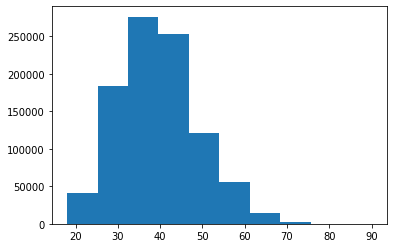

In [124]:
plt.hist(data_df['age'])
plt.show

### For now : drop nan vendor

In [126]:
data_df.dropna(subset=['vendor'],inplace=True)

## Creat the tmp with vendor, title, product and tags for the NLP

In [132]:
data_df['tmp_NLP']= data_df['vendor']+' '+data_df['title']+' '+data_df['product_type']+' '+data_df['tags']

In [134]:
data_df['tmp_NLP']

39                                                      NaN
91                                                      NaN
155                                                     NaN
688                                                     NaN
1132                                                    NaN
                                ...                        
964428    Giuseppe Zanotti-Online Blabber Men Sneakers -...
964429    ChampionDec-Online Champion Sweater/Hoodie - N...
964430    ChampionDec-Online Champion Sweater/Hoodie - N...
964431    ChampionDec-Online Champion 3P Socks - Black S...
964432    Giuseppe Zanotti-Online Basic Ladies Sandals -...
Name: tmp_NLP, Length: 812481, dtype: object

In [137]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 0.0%
NA values in title : 0.0%
NA values in product_type : 20.67%
NA values in tags : 30.54%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 0.0%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%
NA values in tmp_NLP : 37.13%


# NLP process

## extracting 1000 rows

In [263]:
data_sample_100_000_df = data_df.sample(n = 100_000,random_state=42)
data_sample_100_000_df = data_sample_100_000_df.dropna()

## Creating train and test set

In [265]:
data_sample_100_000_df['product_gender'] = 'unisex'
data_sample_100_000_df['product_cat'] = '__'
data_sample_100_000_df['tags'] = data_sample_100_000_df["tags"].str.replace(',',' ')

##Type of product
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('\d{2}'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]X*S[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]M[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|]X*L[\s|]'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Shirt'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Dress'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Underwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Trousers'),'product_cat'] = 'clothes'


data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Watershorts'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Top'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Dresses'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Trousers'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Clothing'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Apparel'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Ready-to-wear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Underwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bra'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('RisingLotus'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('AliceOlivia'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('CasaCalvin'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('RisingLotus'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('RisingLotus'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('RisingLotus'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Shoes'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Footwear'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Boot'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Slippers'),'product_cat'] = 'clothes'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Sandal'),'product_cat'] = 'clothes'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('LeCreuset'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Le Creuset'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('StojoStasher'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Kitchenware'),'product_cat'] = 'kitchen'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Kitchenware'),'product_cat'] = 'kitchen'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bath & Body'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Fragrance'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('The Body Shop'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Dermatory'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Bathing'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Sheet Mask'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Cleansing'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Serum'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Skincare Set'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Makeup'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('MakeUp'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Shower Gel'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Defrisant'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Skincare'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Shampoo'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Leave-in beauty'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Phyto'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Shiseido'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('bareMinerals'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Lip'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Skin'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Personal Care Appliance'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Make-up'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Make up'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Hand Care'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Anti-Aging'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Face'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Eyes'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Hair'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Moisturising'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Aromatherapy Associates'),'product_cat'] = 'bath_body'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bodycare'),'product_cat'] = 'bath_body'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Bb]ag'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Goggles'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Tech Accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('BAG'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bags'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Cap'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Jewelry'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Jewellery'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Accessories'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Wallets'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Belts'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Rings'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('Scarf'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Goods'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Handbags'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bag'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Wallet'),'product_cat'] = 'accessory'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Sunglasses'),'product_cat'] = 'accessory'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Qwehli'),'product_cat'] = 'food'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Seafood'),'product_cat'] = 'food'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Wine'),'product_cat'] = 'wine'
data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Altaya'),'product_cat'] = 'wine'

data_sample_100_000_df.loc[data_sample_100_000_df["vendor"].str.contains('Or Tea'),'product_cat'] = 'drink'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Home Electronics'),'product_cat'] = 'home_appliance'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Homeware'),'product_cat'] = 'home_appliance'

data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Candle'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Towel'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Bedding Set'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Writitng'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Writing'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Luggage'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('CuddleDry'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Paper Product'),'product_cat'] = 'home'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('Pillow Case'),'product_cat'] = 'home'


### Gender of the product
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Mm]en'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Mm]en'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Mm]ale'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Mm]ale'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Mm]an'),'product_gender'] = 'men'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Mm]an'),'product_gender'] = 'men'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Ww]omen'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Ww]omen'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Ff]emale'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Ff]emale'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Ww]oman'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Ww]oman'),'product_gender'] = 'women'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('^[Jj]ewel'),'product_gender'] = 'women'

data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Jj]unior'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Jj]unior'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('[\s|][Bb]aby'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["tags"].str.contains('^[Bb]aby'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('.*[Bb]aby.*'),'product_gender'] = 'children'
data_sample_100_000_df.loc[data_sample_100_000_df["product_type"].str.contains('.*[Kk]ids.*'),'product_gender'] = 'children'

data_sample_100_000_df[(data_sample_100_000_df['product_cat'] != '__')][['vendor','title','product_type','tags','product_cat','product_gender']]
# len(data_sample_100_000_df[(data_sample_100_000_df['product_cat'] == '__')])

# data_sample_100_000_df[(data_sample_100_000_df['product_gender'] == '__')]
# data_sample_100_000_df.head(60)

,vendor,title,product_type,tags,product_cat,product_gender
240080,Timberland-Online,Casual Crew 3 Pack - Dress Blues,Accessories,M Men Socks,accessory,men
567931,Maje-Online,Jumpsuit - Black,Bottom,Jumpsuit T34 T36 T38 T40,clothes,unisex
543708,WEAT-Online,Coin Purse Croco Blue - Dark Blue,Bags,Coin Purse,accessory,unisex
399881,Shiseido-Online,High-Pigment Longwear Eyeliner Via Veneto,Point Eyes,NARS Point Eyes QUOTA3,bath_body,unisex
199225,Balmain-Online,T-Shirt - Black/White,T-Shirt,L M Men S XL XS,clothes,men
...,...,...,...,...,...,...
619366,StojoStasher-Online,Tru Earth Eco-Strips Laundry Detergent (Fresh ...,Laundry Detergent,Eco-friendly Tru Earth,kitchen,unisex
661799,ShiseidoFragrance-Online,Italian Luxury Beauty Dolce Shine EDP - 50ml,Fragrance,Dolce Italian Luxury Beauty QUOTA10,bath_body,unisex
613096,JosephJoseph-Online,Bloom Folding Steamer Basket - Green,Household,Kitchenware,kitchen,unisex
772640,Alluressories-online,George Balanchine Way Necklace - Moonstone,Jewelry,Moonstone Necklace Size F,accessory,women


In [271]:
data_for_train_test = data_sample_100_000_df[(data_sample_100_000_df['product_cat'] != '__')]
# data_for_train_test

In [273]:
from sklearn.model_selection import train_test_split

X = data_for_train_test['tmp_NLP']
y = data_for_train_test['product_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)